In [1]:
import pandas as pd

In [5]:
import csv

with open('ligue1_2020_extended.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    print(list(csv_reader))

[['POSITION', 'CLUB', 'POINTS', 'JOUÉS', 'GAGNÉS', 'NULS', 'PERDUS', 'BUTS POUR', 'BUTS CONTRE', 'DIFF.', 'Pts/J', 'Bp/J', 'Bc/J'], ['1', 'PARIS SAINT-GERMAIN', '68', '27', '22', '2', '3', '75', '24', '51', '2.5185185185185186', '2.7777777777777777', '0.8888888888888888'], ['2', 'OLYMPIQUE DE MARSEILLE', '56', '28', '16', '8', '4', '41', '29', '12', '2.0', '1.4642857142857142', '1.0357142857142858'], ['3', 'STADE RENNAIS FC', '50', '28', '15', '5', '8', '38', '24', '14', '1.7857142857142858', '1.3571428571428572', '0.8571428571428571'], ['4', 'LOSC LILLE', '49', '28', '15', '4', '9', '35', '27', '8', '1.75', '1.25', '0.9642857142857143'], ['5', 'STADE DE REIMS', '41', '28', '10', '11', '7', '26', '21', '5', '1.4642857142857142', '0.9285714285714286', '0.75'], ['6', 'OGC NICE', '41', '28', '11', '8', '9', '41', '38', '3', '1.4642857142857142', '1.4642857142857142', '1.3571428571428572'], ['7', 'OLYMPIQUE LYONNAIS', '40', '28', '11', '7', '10', '42', '27', '15', '1.4285714285714286', '1.

In [66]:
df = pd.read_csv('ligue1_2020_extended.txt')
df.drop(columns=['POSITION'], inplace=True)
#df = df.set_index('CLUB', drop=True)
df         

,CLUB,POINTS,JOUÉS,GAGNÉS,NULS,PERDUS,BUTS POUR,BUTS CONTRE,DIFF.,Pts/J,Bp/J,Bc/J
0,PARIS SAINT-GERMAIN,68,27,22,2,3,75,24,51,2.518519,2.777778,0.888889
1,OLYMPIQUE DE MARSEILLE,56,28,16,8,4,41,29,12,2.000000,1.464286,1.035714
2,STADE RENNAIS FC,50,28,15,5,8,38,24,14,1.785714,1.357143,0.857143
3,LOSC LILLE,49,28,15,4,9,35,27,8,1.750000,1.250000,0.964286
4,STADE DE REIMS,41,28,10,11,7,26,21,5,1.464286,0.928571,0.750000
5,OGC NICE,41,28,11,8,9,41,38,3,1.464286,1.464286,1.357143
6,OLYMPIQUE LYONNAIS,40,28,11,7,10,42,27,15,1.428571,1.500000,0.964286
7,MONTPELLIER HÉRAULT SC,40,28,11,7,10,35,34,1,1.428571,1.250000,1.214286
8,AS MONACO,40,28,11,7,10,44,44,0,1.428571,1.571429,1.571429
9,ANGERS SCO,39,28,11,6,11,28,33,-5,1.392857,1.000000,1.178571


In [78]:
import numpy as np
import matplotlib.pyplot as plt

def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

def draw_stackedbar():
    N = 20
    ticks = df.index
    ind = np.arange(N)    # the x locations for the groups
    width = 0.5       # the width of the bars: can also be len(x) sequence
    p1 = plt.bar(ind, df['GAGNÉS'], width)
    p2 = plt.bar(ind, df['NULS'], width, bottom=df['GAGNÉS'])
    p3 = plt.bar(ind, df['PERDUS'], width, bottom=df['GAGNÉS']+df['NULS'])
    plt.xticks(ticks, rotation='vertical', size=8)
    plt.legend((p1[0], p2[0], p3[0]), ('Gagnés', 'Nuls', 'Perdus'))
    plt.show()

def draw_groupedbar(df, cols):
    N = 20
    x = np.arange(N)  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, df[cols[0]], width, label=cols[0])
    rects2 = ax.bar(x , df[cols[1]], width, label=cols[1])
    rects3 = ax.bar(x + width, df[cols[2]], width, label=cols[2])
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Matchs')
    ax.set_title('Scores')
    ax.set_xticks(x)
    #ax.set_xticklabels(labels)
    ax.legend()
    # label each bar at top
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    autolabel(ax, rects3)
    fig.tight_layout()
    plt.show()
    
def scatter(df,cols,factor=10):
    x = df[cols[0]]
    y = df[cols[1]]
    s, c = np.random.rand(2, 20)
    s = x*factor
    c = x+y
    fig, ax = plt.subplots()
    ax.scatter(x, y, s, c)
    ax.set_ylabel(cols[1])
    ax.set_xlabel(cols[0])
    plt.show()


In [79]:
df.info()
df.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CLUB         20 non-null     object 
 1   POINTS       20 non-null     int64  
 2   JOUÉS        20 non-null     int64  
 3   GAGNÉS       20 non-null     int64  
 4   NULS         20 non-null     int64  
 5   PERDUS       20 non-null     int64  
 6   BUTS POUR    20 non-null     int64  
 7   BUTS CONTRE  20 non-null     int64  
 8   DIFF.        20 non-null     int64  
 9   Pts/J        20 non-null     float64
 10  Bp/J         20 non-null     float64
 11  Bc/J         20 non-null     float64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.9+ KB


RangeIndex(start=0, stop=20, step=1)

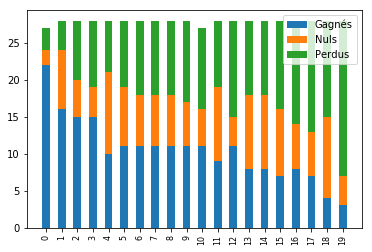

In [80]:
draw_stackedbar()

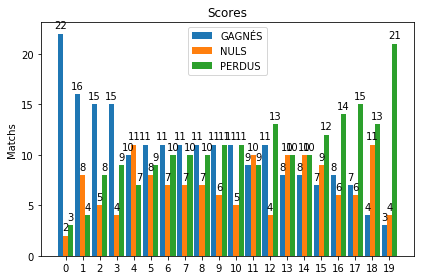

In [81]:
cols = ('GAGNÉS','NULS','PERDUS')
draw_groupedbar(df, cols)

In [82]:
list(df['CLUB'])

['PARIS SAINT-GERMAIN',
 'OLYMPIQUE DE MARSEILLE',
 'STADE RENNAIS FC',
 'LOSC LILLE',
 'STADE DE REIMS',
 'OGC NICE',
 'OLYMPIQUE LYONNAIS',
 'MONTPELLIER HÉRAULT SC',
 'AS MONACO',
 'ANGERS SCO',
 'RC STRASBOURG ALSACE',
 'FC GIRONDINS DE BORDEAUX',
 'FC NANTES',
 'STADE BRESTOIS 29',
 'FC METZ',
 'DIJON FCO',
 'AS SAINT-ÉTIENNE',
 'NÎMES OLYMPIQUE',
 'AMIENS SC',
 'TOULOUSE FC']